In [1]:
source(file = "R/packages.R")
source(file = "R/multiplots.R")
source(file = "R/variables.R")
source(file = "R/utils.R")
source(file = "R/plots.R")

library(ggplot2)
library(xtable)
library(ellipse)
library(reshape)
library(digest)
library(scales)
library(cliffsd)


In [2]:
all <- load.data()

[1] "Reading file data/A24Group@ssGWT-lib.csv"
[1] "Reading file data/aeolusproject@conductor.csv"
[1] "Reading file data/aeolusproject@imagefactory.csv"
[1] "Reading file data/akka@akka.csv"
[1] "Reading file data/alibaba@druid.csv"
[1] "Reading file data/allegro@ralph.csv"
[1] "Reading file data/alphagov@frontend.csv"
[1] "Reading file data/alphagov@smart-answers.csv"
[1] "Reading file data/alphagov@whitehall.csv"
[1] "Reading file data/AppScale@appscale-tools.csv"
[1] "Reading file data/AppScale@appscale.csv"
[1] "Reading file data/asciidoctor@asciidoctor.csv"
[1] "Reading file data/atlasapi@atlas.csv"
[1] "Reading file data/autotest@autotest.csv"
[1] "Reading file data/autotest@virt-test.csv"
[1] "Reading file data/avoinministerio@avoinministerio.csv"
[1] "Reading file data/BaseXdb@basex.csv"
[1] "Reading file data/bbatsov@rubocop.csv"
[1] "Reading file data/bigbluebutton@bigbluebutton.csv"
[1] "Reading file data/Bitmessage@PyBitmessage.csv"
[1] "Reading file data/boto@boto.csv"
[1

# Main Analysis

In [5]:
#  Number of projects per language
for(language in c("ruby", "java", "python", "scala")) {
  printf("%d projects in %s", length(unique(subset(all, lang == language)$project_name)), language)
}

[1] "87 projects in ruby"
[1] "91 projects in java"
[1] "99 projects in python"
[1] "14 projects in scala"


In [7]:
# Number of pullrequests per language
for(language in c("ruby", "java", "python", "scala")) {
  printf("%d pullreqs %s", nrow(subset(all, lang == language)), language)
}


[1] "55468 pullreqs ruby"
[1] "43870 pullreqs java"
[1] "59970 pullreqs python"
[1] "7576 pullreqs scala"


In [3]:
# Columns used in building models
columns = c("team_size", "num_commits", "files_changed",
            "perc_external_contribs", "sloc", "src_churn", "test_churn",
            "commits_on_files_touched", "test_lines_per_kloc",
            "prev_pullreqs", "requester_succ_rate", "num_comments")

In [4]:
merged <- subset(all, merged == TRUE)
non_merged <- subset(all, merged == FALSE)

# Descriptive statistics accross all projects
used <- subset(all, select=columns)

In [11]:
# Why test_cases_per_kloc and asserts_per_kloc are excluded from further analysis
cor.test(all$test_lines_per_kloc, all$test_cases_per_kloc, method="spearman")
cor.test(all$test_lines_per_kloc, all$asserts_per_kloc, method="spearman")


Warning message in cor.test.default(all$test_lines_per_kloc, all$test_cases_per_kloc, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  all$test_lines_per_kloc and all$test_cases_per_kloc
S = 1.234e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8407011 


Warning message in cor.test.default(all$test_lines_per_kloc, all$asserts_per_kloc, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  all$test_lines_per_kloc and all$asserts_per_kloc
S = 6.4674e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9165102 


In [10]:
## Cross correlation matrix accross all model variables
ctab <- cor(used, method = "spearman", use='complete.obs')
colorfun <- colorRamp(c("#ff0000","white","#3366CC"), space="Lab")

## Cross Correlation

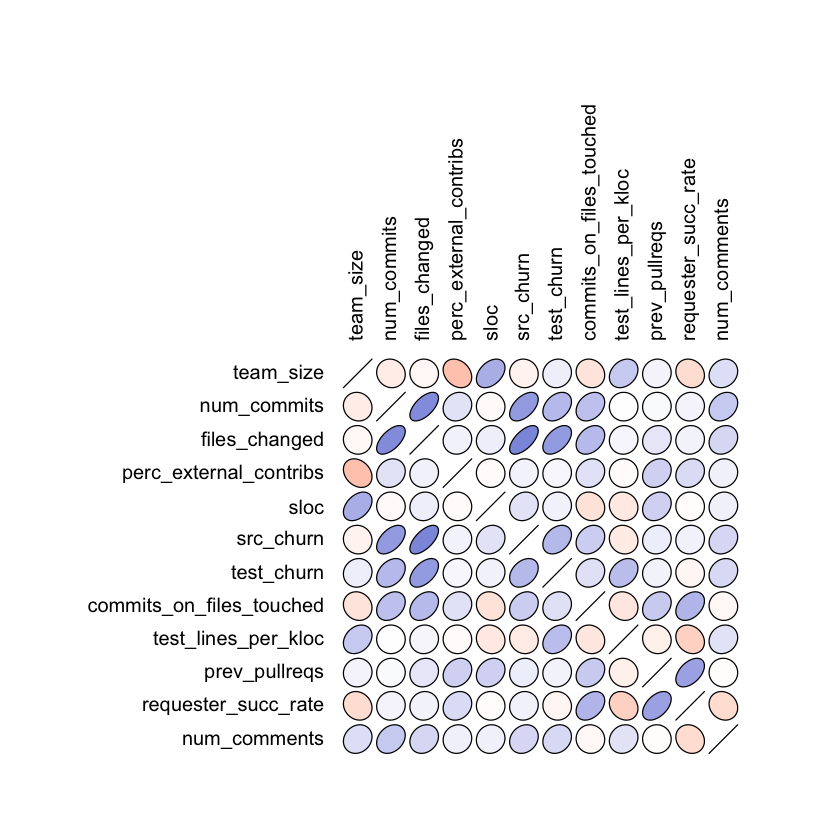

In [14]:
# Cross correlation matrix (Spearman) between examined factors
plotcorr(ctab,
       #col = 'grey',
       col=rgb(colorfun((ctab+1)/2), maxColorValue=255),
       outline = FALSE)

In [15]:
xtable(ctab,
             caption="Cross correlation matrix (Spearman) between examined factors",
             label="tab:crosscor")

,team_size,num_commits,files_changed,perc_external_contribs,sloc,src_churn,test_churn,commits_on_files_touched,test_lines_per_kloc,prev_pullreqs,requester_succ_rate,num_comments
team_size,1.00000000,-0.075088659,-0.02680669,-0.26190499,0.402044698,-0.04888253,0.07827278,-0.11526488,0.268363852,0.049675961,-0.143084909,0.157243357
num_commits,-0.07508866,1.000000000,0.59719436,0.13749887,-0.016446491,0.51563848,0.34986766,0.30600851,0.001872262,0.023814255,0.049471283,0.268022356
files_changed,-0.02680669,0.597194359,1.00000000,0.06544300,0.076331885,0.63035479,0.51009692,0.33810484,0.044933289,0.117218828,0.056596633,0.192508683
perc_external_contribs,-0.26190499,0.137498865,0.06544300,1.00000000,-0.014954700,0.05756054,0.03902670,0.14177985,-0.013136092,0.226920282,0.175544173,0.071406563
sloc,0.40204470,-0.016446491,0.07633189,-0.01495470,1.000000000,0.13512842,0.06458438,-0.11940582,-0.090710460,0.228353456,-0.009765892,0.066339825
src_churn,-0.04888253,0.515638484,0.63035479,0.05756054,0.135128425,1.00000000,0.34301454,0.24033335,-0.082134083,0.082555683,0.063176682,0.188749585
test_churn,0.07827278,0.349867661,0.51009692,0.03902670,0.064584384,0.34301454,1.00000000,0.14541547,0.319656451,0.055244698,-0.034349885,0.182563730
commits_on_files_touched,-0.11526488,0.306008512,0.33810484,0.14177985,-0.119405818,0.24033335,0.14541547,1.00000000,-0.102795136,0.258010025,0.367820329,-0.029795406
test_lines_per_kloc,0.26836385,0.001872262,0.04493329,-0.01313609,-0.090710460,-0.08213408,0.31965645,-0.10279514,1.000000000,-0.062697054,-0.196705856,0.133815238
prev_pullreqs,0.04967596,0.023814255,0.11721883,0.22692028,0.228353456,0.08255568,0.05524470,0.25801002,-0.062697054,1.000000000,0.478598622,-0.007207041


In [11]:
ctab.m <- melt(ctab)

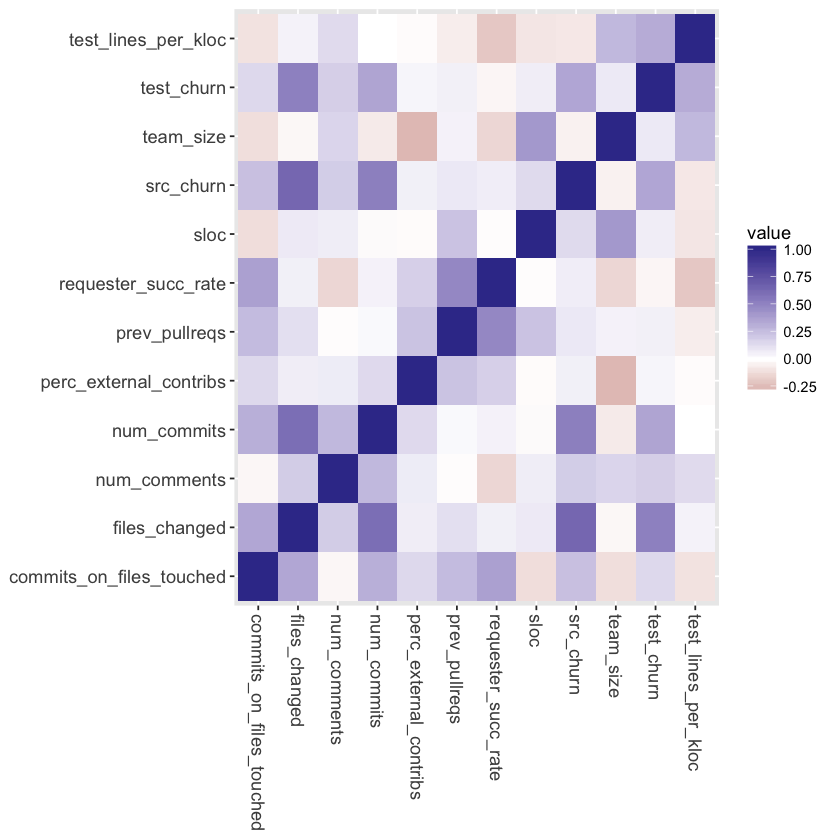

In [17]:
ggplot(ctab.m, aes(X1, X2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(space = "Lab") +
  theme(axis.title = element_blank(),
        axis.text = element_text(size = 11),
        axis.text.x = element_text(angle = -90, hjust = 0, vjust = 0.5))

## Percentage of merged vs unmerged pull requests accross projects

In [12]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [13]:
a <- all
merged.perc <- sqldf("select project_name, (select count(*) from a a1 where a1.project_name = a.project_name and merged = 'TRUE') *1.0/ (select count(*) from a a1 where a1.project_name = a.project_name) as ratio_merged from a group by project_name order by ratio_merged")
merged.perc$order = as.numeric(rownames(merged.perc))

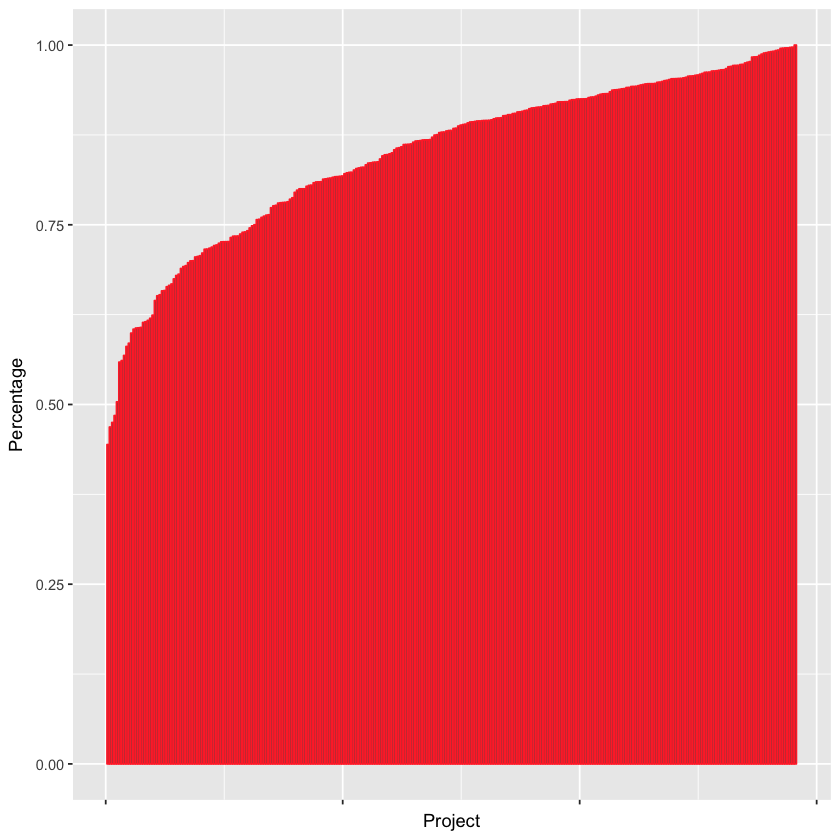

In [21]:
ggplot(merged.perc, aes(x = order, y = ratio_merged)) +
  geom_bar(stat="identity", color = "#ff3333") +
  theme(axis.text.x=element_blank()) +
  ylab("Percentage") +
  xlab("Project")

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9504 rows containing non-finite values (stat_bin).”

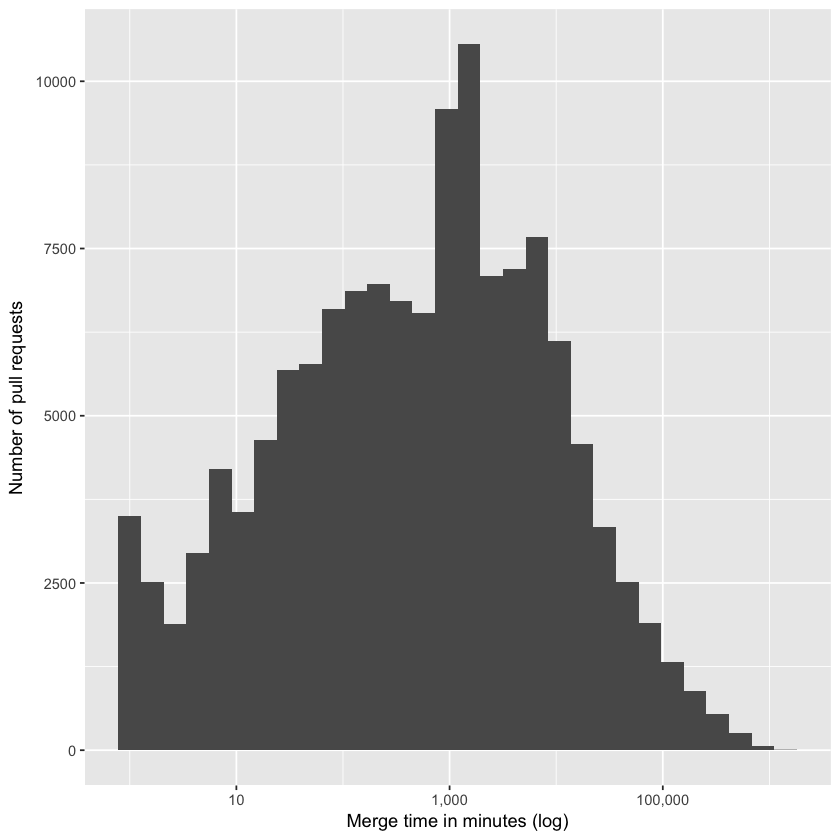

In [22]:
# Time to merge pull request box plots histogram
ggplot(merged, aes(x = mergetime_minutes)) +
  geom_histogram() + scale_x_log10(labels=comma) +
  xlab("Merge time in minutes (log)") +
  ylab("Number of pull requests")

In [14]:
# Size of pull request patch
all$size <- all$src_churn + all$test_churn

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 34674 rows containing non-finite values (stat_bin).”

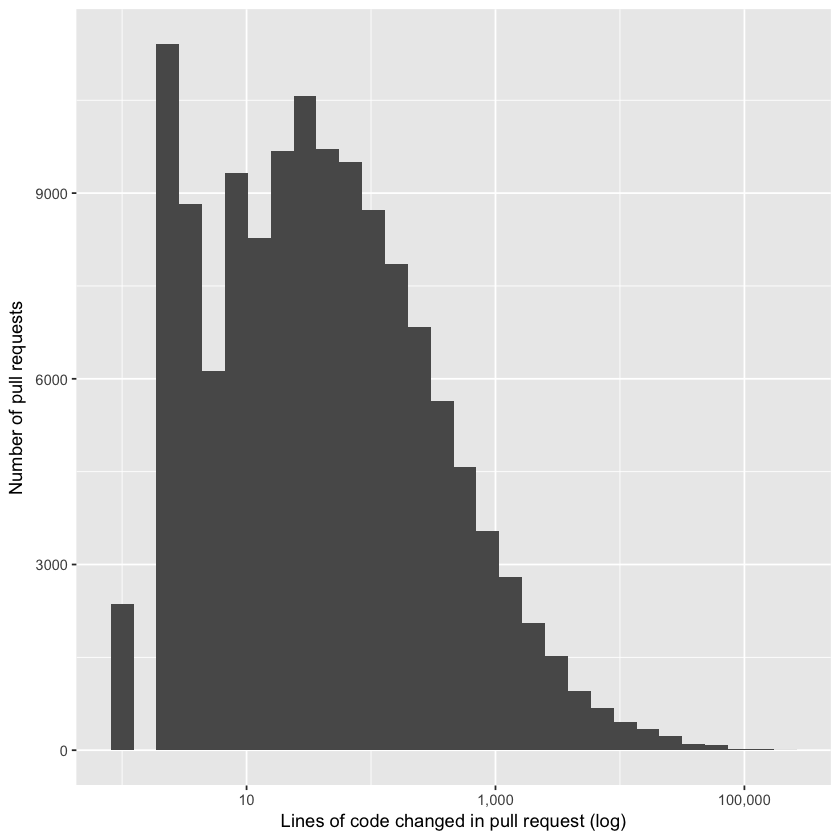

In [24]:

ggplot(all, aes(x = size)) +
  geom_histogram() + scale_x_log10(labels=comma) +
  xlab("Lines of code changed in pull request (log)") +
  ylab("Number of pull requests")

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 4947 rows containing non-finite values (stat_bin).”

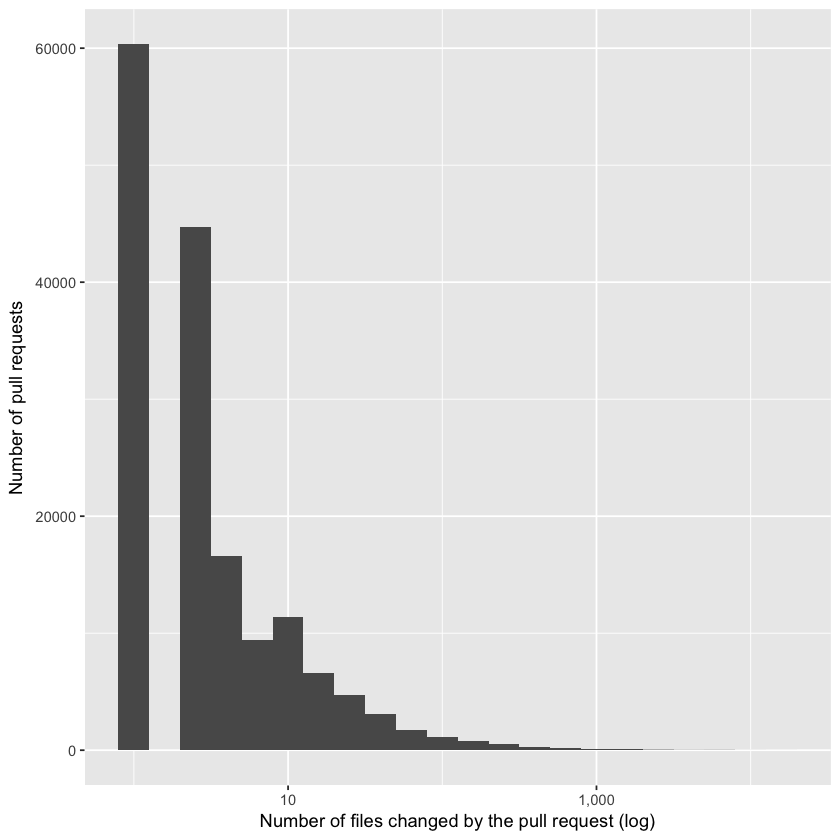

In [25]:
# Size of pull request - files touched
ggplot(all, aes(x = files_changed)) +
  geom_histogram(binwidth = 0.2) + scale_x_log10(labels=comma) +
  xlab("Number of files changed by the pull request (log)") +
  ylab("Number of pull requests")

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 78426 rows containing non-finite values (stat_bin).”

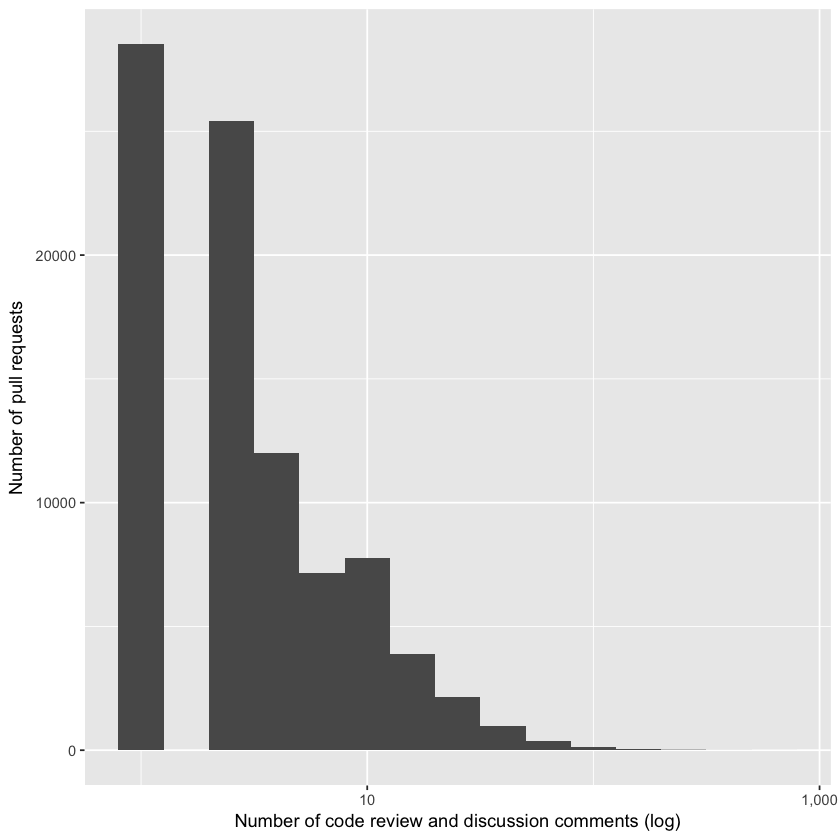

In [26]:
# Size of pull request comments
ggplot(all, aes(x = num_comments)) +
  geom_histogram(binwidth = 0.2) + scale_x_log10(labels=comma) +
  xlab("Number of code review and discussion comments (log)") +
  ylab("Number of pull requests")

# Dataset descriptive statistics

In [15]:
### Dataset descriptive statistics
descr.stats <- data.frame(
  Feature = c('num_commits',
              'src_churn', 
              'test_churn', 
              'files_changed',
              'num_comments', 
#               'num_participants', 
              'sloc', 
              'team_size',
              'perc_external_contribs', 
              'commits_on_files_touched',
              'test_lines_per_kloc', 
              'prev_pullreqs', 
              'requester_succ_rate'),
  Description = c(
    "Number of commits in the pull request",
    "Number of lines changed (added + deleted) by the pull request.",
    "Number of test lines changed in the pull request.",
    "Number of files touched by the pull request.",
    "The total number of comments (discussion and code review).",
#     "Number of participants in the pull request discussion",
    #"The word conflict appears in the pull request comments.",
    #"The pull request comments include links to other pull requests.",
    "Executable lines of code at pull request merge time.",
    "Number of active core team members during the last 3 months prior the pull request creation.",
    "The ratio of commits from external members over core team members in the last 3 months prior to pull request creation.",
    "Number of total commits on files touched by the pull request 3 months before the pull request creation time.",
    "A proxy for the project's test coverage.",
    "Number of pull requests submitted by a specific developer, prior to the examined pull request.",
    "The percentage of the developer's pull requests that have been merged up to the creation of the examined pull request."
    #"Whether the developer belongs to the main repository team."
  )
)



In [16]:
descr.stats$Feature <- as.character(descr.stats$Feature)


In [17]:
descr.stats$quant_5 <- lapply(descr.stats$Feature, function(x){quantile(all[,x], 0.05,na.rm = TRUE)})
descr.stats$mean <- lapply(descr.stats$Feature, function(x){mean(all[,x], na.rm = T)})
descr.stats$median <- lapply(descr.stats$Feature, function(x){median(all[,x], na.rm = T)})
descr.stats$quant_95 <- lapply(descr.stats$Feature, function(x){quantile(all[,x], 0.95, na.rm = T)})
descr.stats$histogram <- lapply(descr.stats$Feature, function(x){
  data <- all[, x]
  unq <- digest(sprintf("descr.stats.%s",as.character(x)))
  fname <- paste(plot.location, sprintf("hist-%s.pdf",unq), sep="/")
  par(mar=c(0,0,0,0))
  plot.window(c(0,1),c(0,1),  xaxs='i', yaxs='i')
  pdf(file = fname , width = 6, height = 3)
  hist(log(data), probability = TRUE, col = "red", border = "white",
       breaks = 10, xlab = "", ylab = "", axes = F, main = NULL)
  dev.off()
  sprintf("\\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-%s.pdf}", unq)
})

In [18]:
table <- xtable(descr.stats, label="tab:features",
                caption="Selected features and descriptive statistics. Historgrams are in log scale.",
                align = c("l","r","p{15em}", rep("c", 5)))
print.xtable(table, file = paste(latex.location, "feature-stats.tex", sep = "/"),
             floating.environment = "table*",
             include.rownames = F, size = c(-2),
             sanitize.text.function = function(str)gsub("_","\\_",str,fixed=TRUE))


In [76]:
table

Feature,Description,quant_5,mean,median,quant_95,histogram
num_commits,Number of commits in the pull request,1,4.46609,1,12,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-f128f3cb38588fe5202716588c047381.pdf}"
src_churn,Number of lines changed (added + deleted) by the pull request.,0,300.7189,10,891,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-1f006c80a0da61518435a0c55f538326.pdf}"
test_churn,Number of test lines changed in the pull request.,0,88.87637,0,282,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-dd78ccaeedd7fc79735a66eb7f9e506b.pdf}"
files_changed,Number of files touched by the pull request.,1,12.11943,2,31,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-9b07b060359435635ff2bf4cd34f834a.pdf}"
num_comments,The total number of comments (discussion and code review).,0,2.765292,1,12,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-9db5e2b390de0d64d26c14798cb579ef.pdf}"
sloc,Executable lines of code at pull request merge time.,1390,60897.87,26036,302156,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-6b5159d3060b4fdf8493d4c818f79949.pdf}"
team_size,Number of active core team members during the last 3 months prior the pull request creation.,1,15.37078,7,65,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-231fb4fabf4a3f0c551f2a97ae080508.pdf}"
perc_external_contribs,The ratio of commits from external members over core team members in the last 3 months prior to pull request creation.,8,52.81223,54,95,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-a222f0a5c377ba129dd6c8f257062591.pdf}"
commits_on_files_touched,Number of total commits on files touched by the pull request 3 months before the pull request creation time.,0,52.38705,5,210,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-b735900ffcc37e7eda16dcd0c3497e6e.pdf}"
test_lines_per_kloc,A proxy for the project's test coverage.,1.390383,1002.613,440.8002,2147.434,"\includegraphics[scale = 0.1, clip = true, trim= 50px 60px 50px 60px]{hist-67ff3047089ba9ce0528884eab66e80a.pdf}"


## Average Merged

In [19]:
dfs <- load.all(dir=data.file.location, pattern="*.csv$")

[1] "Reading file data/A24Group@ssGWT-lib.csv"
[1] "Reading file data/aeolusproject@conductor.csv"
[1] "Reading file data/aeolusproject@imagefactory.csv"
[1] "Reading file data/akka@akka.csv"
[1] "Reading file data/alibaba@druid.csv"
[1] "Reading file data/allegro@ralph.csv"
[1] "Reading file data/alphagov@frontend.csv"
[1] "Reading file data/alphagov@smart-answers.csv"
[1] "Reading file data/alphagov@whitehall.csv"
[1] "Reading file data/AppScale@appscale-tools.csv"
[1] "Reading file data/AppScale@appscale.csv"
[1] "Reading file data/asciidoctor@asciidoctor.csv"
[1] "Reading file data/atlasapi@atlas.csv"
[1] "Reading file data/autotest@autotest.csv"
[1] "Reading file data/autotest@virt-test.csv"
[1] "Reading file data/avoinministerio@avoinministerio.csv"
[1] "Reading file data/BaseXdb@basex.csv"
[1] "Reading file data/bbatsov@rubocop.csv"
[1] "Reading file data/bigbluebutton@bigbluebutton.csv"
[1] "Reading file data/Bitmessage@PyBitmessage.csv"
[1] "Reading file data/boto@boto.csv"
[1

In [77]:
# Merge % overall
printf("Avg pullreq merged: %f", (nrow(merged)/nrow(all))*100)


[1] "Avg pullreq merged: 84.770260"


In [20]:
# Merge % mean
a <- do.call(rbind, Map(function(x) {
  total = nrow(x)
  merged = nrow(subset(x, merged_at > 0))
  unmerged_perc = (100 * (total - merged))/total
  merged_perc = 100 - unmerged_perc
  rbind(data.frame(project=project.name(x), status="merged", value=merged_perc),
        data.frame(project=project.name(x), status="unmerged", value=unmerged_perc))
}, dfs))

printf("Mean of pullreq merged: %f", mean(subset(a, status == "merged")$value))
printf("Shapiro-Wilkes pullreq merged perc pvalue: %f", shapiro.test(subset(a, status == "merged")$value)$p.value)


[1] "Mean of pullreq merged: 84.708697"
[1] "Shapiro-Wilkes pullreq merged perc pvalue: 0.000000"


## Merged Pulled Quantiles

In [21]:
# Merged pull reqs quantiles
to.days <- function(x) {
  x / 60 / 24
}
printf("Merge time in days quantiles: 95: %f, 90: %f, 80: %f",
        to.days(quantile(merged$mergetime_minutes, 0.95)),
        to.days(quantile(merged$mergetime_minutes, 0.90)),
        to.days(quantile(merged$mergetime_minutes, 0.80)))

merged.fast <- subset(merged, mergetime_minutes < 61)
printf("Num pull reqs merged in an hour: %f", nrow(merged.fast))
printf("Perc pull reqs merged in an hour: %f", nrow(merged.fast)/nrow(merged))

printf("Perc fast pull reqs merged from main team members: %f",
       nrow(subset(merged.fast,main_team_member == TRUE))/nrow(merged.fast))



[1] "Merge time in days quantiles: 95: 27.073125, 90: 10.991181, 80: 3.804167"
[1] "Num pull reqs merged in an hour: 43588.000000"
[1] "Perc pull reqs merged in an hour: 0.308112"
[1] "Perc fast pull reqs merged from main team members: 0.420574"


In [22]:
ranksum(subset(merged, mergetime_minutes < 61)$src_churn,
        subset(merged, mergetime_minutes >= 61)$src_churn,
        "pull request churn and merge time -")

[1] "pull request churn and merge time - sizes: a: 43588 b: 97880, medians a: 5.000000 b: 13.000000, means a: 211.488391, b: 285.322211, wilcox: 1792997582.500000, p: 0.000000, d: -0.159479"


## Unmerged pull request lifetime vs merged

In [23]:
# Unmerged pull request lifetime vs merged
non_merged$type <- "unmerged"
merged$type <- "merged"
lifetimes <- rbind(non_merged, merged)

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 10242 rows containing non-finite values (stat_boxplot).”

[1] "Lifetime of merged and unmerged pull requests sizes: a: 141468 b: 25416, medians a: 434.000000 b: 2241.000000, means a: 9501.756998, b: 37323.782578, wilcox: 1298602623.000000, p: 0.000000, d: -0.277661"


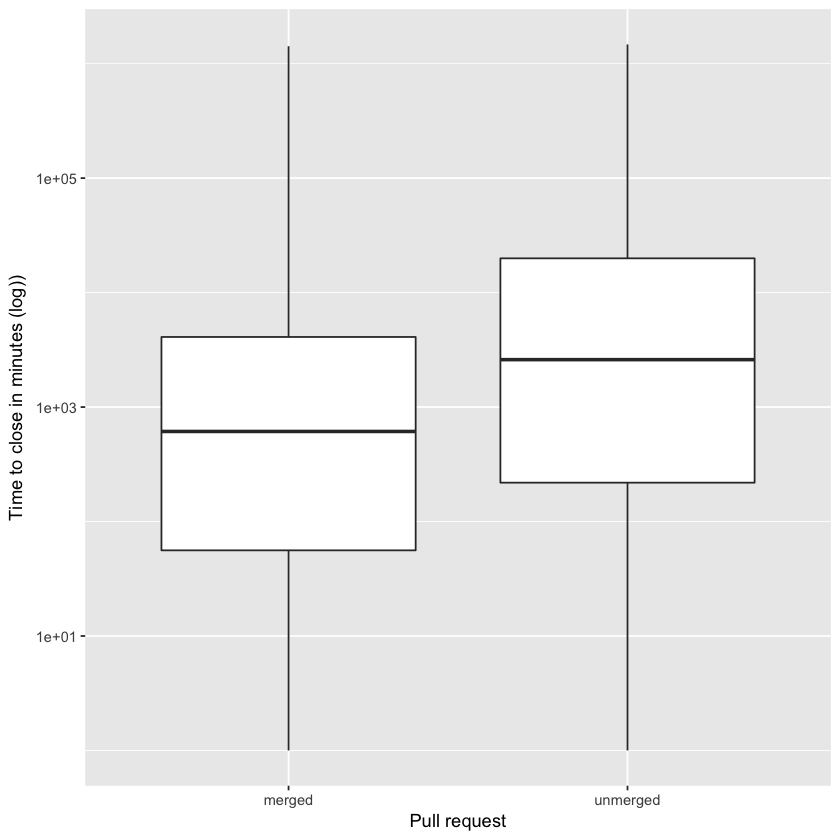

In [7]:
ggplot(lifetimes, aes(x = type, y = lifetime_minutes)) +
  geom_boxplot()  + scale_y_log10() + xlab("Pull request") +
  ylab("Time to close in minutes (log))")

ranksum(merged$lifetime_minutes, non_merged$lifetime_minutes,
        "Lifetime of merged and unmerged pull requests")

In [24]:
# Origin of pull request (main team or external) and mergetime
# Box plot of merge time between main and external team members
teams <- merged
teams$team <- lapply(teams$main_team_member, function(x){if(x){"main"}else{"external"}})
# teams$team <- as.factor(teams$team)



In [ ]:
# Not working??
# ggplot(teams, aes(x = team, y = mergetime_minutes)) +
#   geom_boxplot()  + scale_y_log10() + xlab("Team") +
#   ylab("Time to merge in minutes (log))")

Don't know how to automatically pick scale for object of type list. Defaulting to continuous.


In [7]:
# Rank correlation to see whether the populations differ significantly
ranksum(subset(merged, main_team_member == T)$mergetime_minutes, 
        subset(merged, main_team_member == F)$mergetime_minutes, 
        "pull request origin and merge time")

[1] "pull request origin and merge time sizes: a: 51865 b: 89603, medians a: 278.000000 b: 518.000000, means a: 5360.261178, b: 11901.519748, wilcox: 2091789169.000000, p: 0.000000, d: -0.099775"


## Pull requests merge time at the proejct level


In [28]:
list(merged$project_name)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [27]:
subset(aggregate(merged, list(merged$project_name), mean), select = col1)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], 

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

team_size,num_commits,files_changed,perc_external_contribs,sloc,src_churn,test_churn,commits_on_files_touched,test_lines_per_kloc,prev_pullreqs,requester_succ_rate,num_comments,mergetime_minutes
7.4460784,2.622549,4.191176,69.70588,6656.098,301.30882,5.544118,11.838235,42.717971,17.4362745,0.91992852,3.392156863,1215.1814
22.2297872,2.787234,11.089362,32.73191,17383.834,117.15319,55.136170,25.706383,467.435857,13.6425532,0.61008015,1.285106383,8383.8426
2.9951691,2.449275,3.599034,47.84541,4471.720,171.52174,11.024155,16.014493,107.334981,41.9516908,0.81678899,0.309178744,3544.0821
9.7415575,3.199862,10.090283,60.75948,46767.511,273.55548,84.731909,131.206065,442.311238,132.3659545,0.84995190,10.820813232,3883.7147
2.4321767,1.182965,5.258675,25.52050,85460.041,175.47634,94.924290,17.917981,613.982918,74.6435331,0.86841512,0.022082019,175.4038
5.5950096,6.909789,6.107486,74.15355,33679.539,331.99616,76.746641,73.259117,251.449491,49.2955854,0.90653635,2.737044146,2152.9827
18.4240196,3.752451,5.085784,63.80637,1036.277,33.19363,34.004902,67.169118,2774.492455,19.7941176,0.85028489,0.987745098,3733.1446
10.1338583,4.011811,4.334646,69.28740,10869.541,132.14764,216.230315,65.220472,1838.596397,43.1791339,0.89706807,0.462598425,1770.1752
15.2325581,6.109819,15.387597,47.96253,26762.317,122.78682,110.445736,162.307494,1199.353793,37.0749354,0.85022983,2.543927649,1990.2429
0.8127854,8.397260,6.721461,97.22374,2348.982,493.30594,155.004566,158.547945,1997.232086,107.4885845,0.91639670,0.885844749,1567.7945


In [25]:
# Pull requests merge time at the proejct level
print("Cross correlation table for median time to merge vs other variables")
col1 <- c(columns, 'mergetime_minutes')
cot.tab <- cor(subset(aggregate(merged, list(merged$project_name), mean), select = col1),
    method = "spearman")

[1] "Cross correlation table for median time to merge vs other variables"


Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], 

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

In [31]:
aggregate(merged, list(merged$project_name), median)

ERROR: Error in median.default(X[[i]], ...): need numeric data


In [30]:
mean.mergetime.per.project <- aggregate(merged, list(merged$project_name), median)[c('Group.1','mergetime_minutes')]


ERROR: Error in median.default(X[[i]], ...): need numeric data


In [29]:

printf("Perc projects with mean mergetime < 1 week: %f",
              nrow(subset(mean.mergetime.per.project, mergetime_minutes < 10080))/
                nrow(mean.mergetime.per.project))

ERROR: Error in median.default(X[[i]], ...): need numeric data


## Pull request sizes


In [32]:
# Pull request sizes
printf("Pullreqs commits quantiles: 95: %f, 90: %f, 80: %f",
       quantile(all$num_commits, 0.95),
       quantile(all$num_commits, 0.90),
       quantile(all$num_commits, 0.80))

[1] "Pullreqs commits quantiles: 95: 12.000000, 90: 6.000000, 80: 3.000000"


In [35]:
printf("Median commits %f", median(all$num_commits))

printf("Pullreqs num_files quantiles: 95: %f, 90: %f, 80: %f",
       quantile(all$files_changed, 0.95),
       quantile(all$files_changed, 0.90),
       quantile(all$files_changed, 0.80))

printf("Median files changed %f", median(all$files_changed))

printf("Merged pull reqs lines quantiles: 95: %f, 90: %f, 80: %f",
       quantile(all$src_churn + all$test_churn, 0.95),
       quantile(all$src_churn + all$test_churn, 0.90),
       quantile(all$src_churn + all$test_churn, 0.80))

printf("Median source churn %f", median(all$src_churn + all$test_churn))



[1] "Median commits 1.000000"
[1] "Pullreqs num_files quantiles: 95: 31.000000, 90: 15.000000, 80: 7.000000"
[1] "Median files changed 2.000000"
[1] "Merged pull reqs lines quantiles: 95: 1213.000000, 90: 489.000000, 80: 162.000000"
[1] "Median source churn 17.000000"


## Pull requests and tests


In [37]:
# Pull requests and tests
printf("Perc pull reqs modifying non-code: %f", 1 - nrow(subset(all, src_churn > 0 | test_churn >0))/nrow(all))
printf("Perc Pull reqs modifying test code: %f", nrow(subset(all, test_churn > 0))/nrow(all))
printf("Perc Pull reqs modifying test code exclusively: %f", nrow(subset(all, test_churn > 0 & src_churn == 0))/nrow(all))
printf("Perc test pull reqs merged: %f", nrow(subset(all, test_churn > 0 & merged == T))/nrow(subset(all, test_churn > 0)))


[1] "Perc pull reqs modifying non-code: 0.207773"
[1] "Perc Pull reqs modifying test code: 0.325777"
[1] "Perc Pull reqs modifying test code exclusively: 0.046206"
[1] "Perc test pull reqs merged: 0.836684"


In [38]:
ranksum(subset(merged, test_churn > 0, c(mergetime_minutes))$mergetime_minutes,
        subset(merged, test_churn == 0, c(mergetime_minutes))$mergetime_minutes,
        "existence of tests and mergetime")

[1] "existence of tests and mergetime sizes: a: 45488 b: 95980, medians a: 1060.000000 b: 280.000000, means a: 13170.691105, b: 7765.299260, wilcox: 2591712985.000000, p: 0.000000, d: 0.187242"


In [39]:
ranksum(subset(aggregate(cbind(test_lines_per_kloc, mergetime_minutes) ~ project_name, merged, mean), test_lines_per_kloc < 1000)$mergetime_minutes,
        subset(aggregate(cbind(test_lines_per_kloc, mergetime_minutes) ~ project_name, merged, mean), test_lines_per_kloc > 1000)$mergetime_minutes,
        "good testing vs mergetime")

[1] "good testing vs mergetime sizes: a: 234 b: 57, medians a: 4674.351538 b: 11594.538117, means a: 9409.689246, b: 20388.702337, wilcox: 4150.000000, p: 0.000010, d: -0.377718"


In [40]:
mean.testing.per.project <- aggregate(cbind(test_lines_per_kloc, mergetime_minutes) ~ project_name, merged, mean)
ranksum(head(mean.testing.per.project[order(mean.testing.per.project$test_lines_per_kloc),], 20)$mergetime_minutes, 
        tail(mean.testing.per.project[order(mean.testing.per.project$test_lines_per_kloc),], 20)$mergetime_minutes)


[1] " sizes: a: 20 b: 20, medians a: 2832.613242 b: 13902.810489, means a: 5473.035590, b: 18244.909092, wilcox: 65.000000, p: 0.000136, d: -0.675000"


## Pull request discusion


In [41]:
# Pull request discusion
printf("Merged pull reqs comments quantiles: 95: %f, 90: %f, 80: %f",
       quantile(all$num_comments, 0.95),
       quantile(all$num_comments, 0.90),
       quantile(all$num_comments, 0.80))

cor.test(all$lifetime_minutes, all$num_comments, method = "spearman")
cor.test(merged$lifetime_minutes, merged$num_comments, method = "spearman")
cor.test(non_merged$lifetime_minutes, non_merged$num_comments, method = "spearman")


[1] "Merged pull reqs comments quantiles: 95: 12.000000, 90: 7.000000, 80: 4.000000"


Warning message in cor.test.default(all$lifetime_minutes, all$num_comments, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  all$lifetime_minutes and all$num_comments
S = 4.1151e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4687581 


Warning message in cor.test.default(merged$lifetime_minutes, merged$num_comments, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  merged$lifetime_minutes and merged$num_comments
S = 2.4431e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4822464 


Warning message in cor.test.default(non_merged$lifetime_minutes, non_merged$num_comments, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  non_merged$lifetime_minutes and non_merged$num_comments
S = 1.7002e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3786473 


## Code review, pimp the data frame with info about code review


In [55]:
# Code review, pimp the data frame with info about code review
has.code.review <- function(row) {
  q = sprintf("select count(*) as cnt from pull_request_comments prc where prc.pull_request_id = %s", row["pull_req_id"])
  printf("%s/%s",row["project_name"],row["github_id"])
  res <- dbSendQuery(con,q) 
  num_code_review <- fetch(res, n = -1)
  num_code_review > 0
}

In [51]:
has.code.review

function(row) {
  q = sprintf("select count(*) as cnt from pull_request_comments prc where prc.pull_request_id = %d", row["pull_req_id"])
  printf("%s/%s",row$project_name,row$github_id)
  res <- dbSendQuery(con,q) 
  num_code_review <- fetch(res, n = -1)
  num_code_review > 0
}

In [56]:
all$code_review <- apply(all, 1, has.code.review)

[1] "A24Group/ssGWT-lib/220"


ERROR: Error in dbSendQuery(con, q): object 'con' not found


In [44]:
reviewed <- subset(all, code_review == T)
non.reviewed <- subset(all, code_review == F)

ERROR: Error in row$pull_req_id: $ operator is invalid for atomic vectors


In [43]:

printf("Pull reqs with code review: %d, %f%%", nrow(reviewed), nrow(reviewed)/nrow(all))
printf("Reviewed and merged %%: %f", nrow(subset(reviewed, merged == T))/nrow(reviewed))
ranksum(subset(reviewed, merged == T)$lifetime_minutes,
        subset(non.reviewed, merged == T)$lifetime_minutes,
        "code review and mergetime")

ERROR: Error in row$pull_req_id: $ operator is invalid for atomic vectors


## Pull request conflicts, do they affect merge time?


In [57]:
# Pull request conflicts, do they affect merge time?
ranksum(subset(merged, conflict == T)$mergetime_minutes,
        subset(merged, conflict == F)$mergetime_minutes,
        "conflicts and merge time -")

[1] "conflicts and merge time - sizes: a: 1831 b: 139637, medians a: 10207.000000 b: 406.000000, means a: 42033.330967, b: 9076.811955, wilcox: 205745342.500000, p: 0.000000, d: 0.609427"


# General Stuff

In [48]:
write.csv(all, "AllData_Distill.csv")

In [45]:
all

,pull_req_id,project_name,lang,github_id,created_at,merged_at,closed_at,lifetime_minutes,mergetime_minutes,merged_using,⋯,asserts_per_kloc,watchers,requester,prev_pullreqs,requester_succ_rate,followers,intra_branch,main_team_member,merged,size
1,1998470,A24Group/ssGWT-lib,java,220,1377693657,1377748331,1377748331,911,911,github,⋯,4.953477,5,nauderuan,25,0.9600000,5,TRUE,FALSE,TRUE,0
2,1904236,A24Group/ssGWT-lib,java,219,1375887412,1375937076,1375937076,827,827,github,⋯,4.954804,4,Rynoh,11,1.0000000,6,TRUE,FALSE,TRUE,22
3,1857406,A24Group/ssGWT-lib,java,218,1375078176,1375106234,1375106235,467,467,github,⋯,5.049127,4,michaelbarnard,42,0.9285714,10,FALSE,FALSE,TRUE,15
4,1807435,A24Group/ssGWT-lib,java,217,1374499015,1374499278,1374499279,4,4,github,⋯,5.049127,4,Sh33pman,35,1.0000000,8,TRUE,FALSE,TRUE,0
5,1805341,A24Group/ssGWT-lib,java,216,1374475132,1375344073,1375344074,14482,14482,github,⋯,5.049127,4,nauderuan,24,0.9583333,5,TRUE,FALSE,TRUE,831
6,2006608,A24Group/ssGWT-lib,java,215,1374239632,1374240401,1374240401,12,12,github,⋯,5.049471,4,Sh33pman,34,1.0000000,8,TRUE,FALSE,TRUE,0
7,1790115,A24Group/ssGWT-lib,java,214,1374143769,1374144839,1374144839,17,17,github,⋯,6.182638,4,michaelbarnard,41,0.9268293,10,FALSE,FALSE,TRUE,54
8,1784253,A24Group/ssGWT-lib,java,213,1374052641,1374052692,1374052692,0,0,github,⋯,6.182638,4,NeilNienaber,3,1.0000000,0,TRUE,FALSE,TRUE,2
9,1784226,A24Group/ssGWT-lib,java,212,1374052182,1374052517,1374052517,5,5,github,⋯,6.184189,4,NeilNienaber,2,1.0000000,0,TRUE,FALSE,TRUE,12
10,1773012,A24Group/ssGWT-lib,java,210,1373886855,1373899963,1373899963,218,218,github,⋯,6.184189,4,AlecErasmus,56,0.9642857,3,TRUE,FALSE,TRUE,0
